# 多重輸入利用NN模型預測大盤指數

## Loading Data

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_excel("C:/Users/黃柏倫/Desktop/data/python project/大盤指數盤後數據.xlsx",header=0)

In [5]:
dg=pd.read_excel("C:/Users/黃柏倫/Desktop/data/python project/全球new.xlsx",header=0)

In [6]:
dg=dg[2:]

# 利用香港恆生資料(高相關係數)來進行預測

## 資料處理

In [170]:
from keras.utils import np_utils

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
from keras.models import Sequential
from keras.layers import Dense,LSTM, add

In [173]:
from keras.models import Model
from keras.layers import Input,concatenate,Dropout

In [174]:
def nor(t):
    t-= t.min()
    t =t/t.max()
    return t

In [175]:
df['年月日']=pd.to_datetime(df['年月日'])
dg['年月日']=pd.to_datetime(dg['年月日'])

In [176]:
d_txoc=df[['年月日','收盤價']]
d_txov=df[['年月日','成交值']]
d_ups=df[['年月日','漲跌平']]
d_hsi=dg[['年月日','香港恆生']]

In [177]:
DF=pd.merge(d_txoc,d_txov)
DF=pd.merge(DF,d_ups)
DF=pd.merge(DF,d_hsi)
DF.index=range(len(DF))
DF.head()

,年月日,收盤價,成交值,漲跌平,香港恆生
0,1997-01-04,6820.35,36466000,0.0,13222.8
1,1997-01-06,6844.75,35696000,1.0,13443.9
2,1997-01-07,6875.02,50760000,1.0,13420.2
3,1997-01-08,7019.43,79860000,2.0,13454.9
4,1997-01-09,7010.76,81908000,1.0,13198.1


In [178]:
dfc=np.array(DF['收盤價'])
dfv=np.array(DF['成交值'])
dfh=np.array(DF['香港恆生'])
dfups=np.array(DF['漲跌平'])
dfd=DF['年月日']

In [179]:
a=[]
b=[]
c=[]
y=[]
n=5
after=0
for i in range(len(DF.index)-n):
    a.append(dfc[after+i:after+i+n])
    b.append(dfv[after+i:after+i+n])
    c.append(dfh[after+i:after+i+n])
    y.append(DF.漲跌平[after+i+n])
a=np.array(a).reshape(len(a),n)
b=np.array(b).reshape(len(b),n)
c=np.array(c).reshape(len(b),n)
yy = np_utils.to_categorical(y, 3)

In [213]:
# 用了會預測結果很極端
'''for i in range(len(a)):
    a[i]=nor(a[i])
    b[i]=nor(b[i])
    c[i]=nor(c[i])'''

In [181]:
se=87
a_train,a_test,y_train,y_test=train_test_split(a,yy,test_size=0.3,random_state=se)
b_train,b_test,y_train,y_test=train_test_split(b,yy,test_size=0.3,random_state=se)
c_train,c_test,y_train,y_test=train_test_split(c,yy,test_size=0.3,random_state=se)

## 建立模型

In [182]:
f_1 = Dense(300,input_dim=n, activation='sigmoid')
g_1 = Dense(300,input_dim=n, activation='sigmoid')
fg_1= Dense(150,input_dim=n, activation='relu')
h_1 = Dense(300,input_dim=n, activation='sigmoid')

z_1 = Dense(3, activation='softmax')

In [183]:
a0 = Input(shape=(n,))
b0 = Input(shape=(n,))
c0 = Input(shape=(n,))

a1 = f_1(a0)
b1 = g_1(b0)

u1 = concatenate([a1,b1])
ab = fg_1(u1)

c1 = h_1(c0)

u2 = concatenate([ab,c1])

q = z_1(u2)

In [184]:
model = Model([a0,b0,c0],q )
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
input_29 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
dense_42 (Dense)                (None, 300)          1800        input_28[0][0]                   
__________________________________________________________________________________________________
dense_43 (Dense)                (None, 300)          1800        input_29[0][0]                   
__________________________________________________________________________________________________
concatenat

In [185]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['acc'])#,validation)

## 訓練與預測

In [186]:
model.fit([a_train,b_train,c_train], y_train,batch_size=100,epochs=20)

Epoch 1/20
3942/3942 [==============================] - 1s 241us/step - loss: 1.1079 - acc: 0.3841
Epoch 2/20
3942/3942 [==============================] - 0s 51us/step - loss: 1.0966 - acc: 0.3848
Epoch 3/20
3942/3942 [==============================] - 0s 55us/step - loss: 1.1043 - acc: 0.3891
Epoch 4/20
3942/3942 [==============================] - 0s 49us/step - loss: 1.0953 - acc: 0.3957
Epoch 5/20
3942/3942 [==============================] - 0s 55us/step - loss: 1.0892 - acc: 0.3965
Epoch 6/20
3942/3942 [==============================] - 0s 53us/step - loss: 1.0843 - acc: 0.4049
Epoch 7/20
3942/3942 [==============================] - 0s 57us/step - loss: 1.0853 - acc: 0.3952
Epoch 8/20
3942/3942 [==============================] - 0s 60us/step - loss: 1.0824 - acc: 0.3988
Epoch 9/20
3942/3942 [==============================] - 0s 53us/step - loss: 1.0896 - acc: 0.3922
Epoch 10/20
3942/3942 [==============================] - 0s 61us/step - loss: 1.0863 - acc: 0.4056
Epoch 11/20
3942/3

In [187]:
model.evaluate([a_test,b_test,c_test], y_test)

1690/1690 [==============================] - 0s 183us/step


[1.0818414760059154, 0.398224852212082]

In [188]:
model.predict([a_test,b_test,c_test])

array([[0.27374917, 0.37808007, 0.34817073],
       [0.23790516, 0.42276627, 0.3393286 ],
       [0.30296743, 0.3222613 , 0.37477127],
       ...,
       [0.2373146 , 0.42436993, 0.3383155 ],
       [0.298067  , 0.38140327, 0.3205297 ],
       [0.22061993, 0.42712736, 0.35225266]], dtype=float32)

## 視覺化

In [189]:
yp = model.predict([a,b,c])
ypp=np.argmax(yp,axis=1)

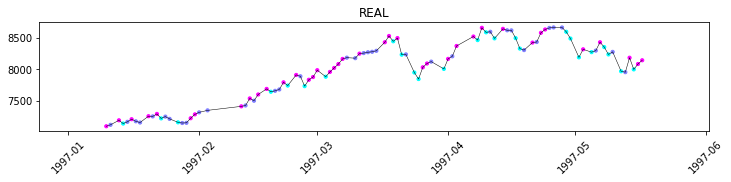

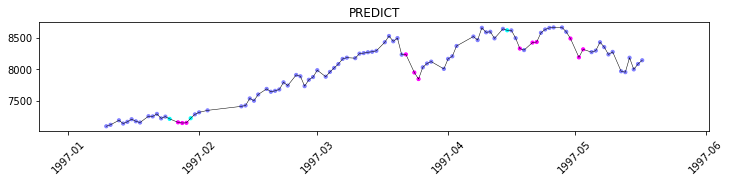

In [190]:
st=0
end=st+n+100

plt.figure(figsize=(12,2))
plt.title("REAL")
plt.scatter(dfd[n+st:end],dfc[n+st:end],c=y[st:end-n],s=10,cmap='cool')
plt.xticks(rotation=45)
plt.plot(dfd[n+st:end],dfc[n+st:end],c='black', linewidth=0.5)

plt.figure(figsize=(12,2))
plt.title("PREDICT")
plt.scatter(dfd[n+st:end],dfc[n+st:end],c=ypp[st:end-n],s=10,cmap='cool')
plt.xticks(rotation=45)
plt.plot(dfd[n+st:end],dfc[n+st:end],c='black', linewidth=0.5)

# 利用外資買賣超市值(籌碼資訊)來進行預測

## 資料處理

In [207]:
from keras.models import Model
from keras.layers import Input,concatenate,Dropout

In [208]:
df['年月日']=pd.to_datetime(df['年月日'])
dg['年月日']=pd.to_datetime(dg['年月日'])

In [209]:
d_txoc=df[['年月日','收盤價']]
d_txov=df[['年月日','成交值']]
d_ups=df[['年月日','漲跌平']]
d_of=df[['年月日','外資買賣超市值(百萬)']]

In [210]:
DF=pd.merge(d_txoc,d_txov)
DF=pd.merge(DF,d_ups)
DF=pd.merge(DF,d_of)
DF=DF.dropna()
DF.index=range(len(DF))
DF.head()

,年月日,收盤價,成交值,漲跌平,外資買賣超市值(百萬)
0,1996-09-02,6342.17,35463000,1.0,561.85
1,1996-09-03,6257.97,37428000,0.0,132.37
2,1996-09-04,6228.78,40213000,1.0,897.03
3,1996-09-05,6304.96,39001000,2.0,759.03
4,1996-09-06,6290.23,31401000,1.0,-142.73


In [211]:
dfc=np.array(DF['收盤價'])
dfv=np.array(DF['成交值'])
dfo=np.array(DF['外資買賣超市值(百萬)'])
dfups=np.array(DF['漲跌平'])
dfd=DF['年月日']

In [212]:
a=[]
b=[]
c=[]
y=[]
n=5
after=0
for i in range(len(DF.index)-n):
    a.append(dfc[after+i:after+i+n])
    b.append(dfv[after+i:after+i+n])
    c.append(dfo[after+i:after+i+n])
    y.append(DF.漲跌平[after+i+n])
a=np.array(a).reshape(len(a),n)
b=np.array(b).reshape(len(b),n)
c=np.array(c).reshape(len(b),n)
yy = np_utils.to_categorical(y, 3)

In [213]:
# 用了會預測結果很極端
'''for i in range(len(a)):
    a[i]=nor(a[i])
    b[i]=nor(b[i])
    c[i]=nor(c[i])'''

In [214]:
se=87
a_train,a_test,y_train,y_test=train_test_split(a,yy,test_size=0.3,random_state=se)
b_train,b_test,y_train,y_test=train_test_split(b,yy,test_size=0.3,random_state=se)
c_train,c_test,y_train,y_test=train_test_split(c,yy,test_size=0.3,random_state=se)

## 建立模型

In [ ]:
f_1 = Dense(300,input_dim=n, activation='sigmoid')
g_1 = Dense(300,input_dim=n, activation='sigmoid')
h_1 = Dense(300,input_dim=n, activation='sigmoid')

z_1 = Dense(3, activation='softmax')

In [ ]:
a0 = Input(shape=(n,))
b0 = Input(shape=(n,))
c0 = Input(shape=(n,))

a1 = f_1(a0)
b1 = g_1(b0)
c1 = h_1(c0)

u2 = concatenate([a1,c1])

q = z_1(u2)

In [217]:
model2 = Model([a0,b0,c0],q )
model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_34 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
input_35 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
dense_52 (Dense)                (None, 300)          1800        input_34[0][0]                   
__________________________________________________________________________________________________
dense_53 (Dense)                (None, 300)          1800        input_35[0][0]                   
__________________________________________________________________________________________________
concatenat

In [218]:
model2.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['acc'])#,validation)

## 訓練與預測

In [219]:
model2.fit([a_train,b_train,c_train], y_train,batch_size=100,epochs=20)

Epoch 1/20
4009/4009 [==============================] - 1s 254us/step - loss: 1.1136 - acc: 0.3819
Epoch 2/20
4009/4009 [==============================] - 0s 54us/step - loss: 1.1004 - acc: 0.3881
Epoch 3/20
4009/4009 [==============================] - 0s 43us/step - loss: 1.0905 - acc: 0.3859
Epoch 4/20
4009/4009 [==============================] - 0s 54us/step - loss: 1.1063 - acc: 0.3704
Epoch 5/20
4009/4009 [==============================] - 0s 46us/step - loss: 1.0882 - acc: 0.4003
Epoch 6/20
4009/4009 [==============================] - 0s 49us/step - loss: 1.0944 - acc: 0.3951
Epoch 7/20
4009/4009 [==============================] - 0s 60us/step - loss: 1.0873 - acc: 0.3866: 0s - loss: 1.0795 - acc: 0.
Epoch 8/20
4009/4009 [==============================] - 0s 56us/step - loss: 1.0922 - acc: 0.3866
Epoch 9/20
4009/4009 [==============================] - 0s 61us/step - loss: 1.0973 - acc: 0.3876
Epoch 10/20
4009/4009 [==============================] - 0s 63us/step - loss: 1.0886 - a

In [220]:
model2.evaluate([a_test,b_test,c_test], y_test)

1719/1719 [==============================] - 0s 205us/step


[1.0848040705575992, 0.4089586968648011]

In [221]:
model2.predict([a_test,b_test,c_test])

array([[0.21547955, 0.43282366, 0.35169676],
       [0.26660922, 0.40281287, 0.33057788],
       [0.28751844, 0.36470464, 0.34777698],
       ...,
       [0.23877652, 0.44520563, 0.31601793],
       [0.2540962 , 0.41478983, 0.33111393],
       [0.29681525, 0.4028681 , 0.3003167 ]], dtype=float32)

## 視覺化

In [222]:
yp = model2.predict([a,b,c])
ypp=np.argmax(yp,axis=1)

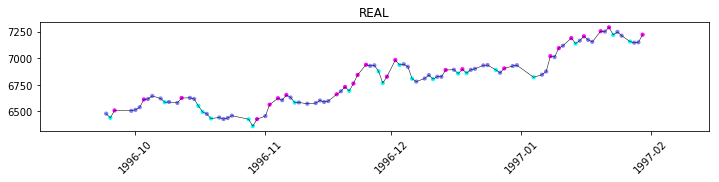

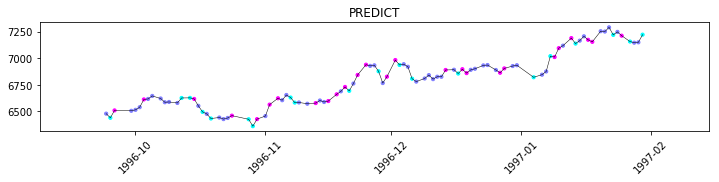

In [313]:
st=0
end=st+n+100

plt.figure(figsize=(12,2))
plt.title("REAL")
plt.scatter(dfd[n+st:end],dfc[n+st:end],c=y[st:end-n],s=10,cmap='cool')
plt.xticks(rotation=45)
plt.plot(dfd[n+st:end],dfc[n+st:end],c='black', linewidth=0.5)

plt.figure(figsize=(12,2))
plt.title("PREDICT")
plt.scatter(dfd[n+st:end],dfc[n+st:end],c=ypp[st:end-n],s=10,cmap='cool')
plt.xticks(rotation=45)
plt.plot(dfd[n+st:end],dfc[n+st:end],c='black', linewidth=0.5)

# 利用盤後總資訊(價格,籌碼)進行預測

## 資料處理

In [247]:
df['年月日']=pd.to_datetime(df['年月日'])
dg['年月日']=pd.to_datetime(dg['年月日'])

In [248]:
d_txoc=df[['年月日','收盤價']]
d_txov=df[['年月日','成交值']]
d_ups=df[['年月日','漲跌平']]

d_of=df[['年月日','外資買賣超市值(百萬)']]
d_self=df[['年月日','自營買賣超市值(百萬)']]

d_high=df[['年月日','最高價']]
d_low=df[['年月日','最低價']]
d_borrow=df[['年月日','融資增減(千元)']]
d_tick=df[['年月日','融券增減(張)']]

In [249]:
def MER (a):
    s=a[0]
    for i in range(len(a)-1):
        s=pd.merge(s,a[i+1])
    return s

In [250]:
DF=MER([d_txoc,d_txov,d_ups,d_of,d_self,d_high,d_low,d_borrow,d_tick])
DF=DF.dropna()
DF.index=range(len(DF))
DF.head()

,年月日,收盤價,成交值,漲跌平,外資買賣超市值(百萬),自營買賣超市值(百萬),最高價,最低價,融資增減(千元),融券增減(張)
0,1996-09-18,6499.02,45207000,1.0,284.71,0.0,6508.13,6452.37,902185.0,6506.0
1,1996-09-19,6535.59,51472000,2.0,403.21,0.0,6558.26,6535.59,1524201.0,6113.0
2,1996-09-20,6499.52,51295000,0.0,290.72,0.0,6546.36,6492.30,114456.0,-906.0
3,1996-09-21,6490.09,37692000,1.0,-220.08,0.0,6528.81,6485.92,418937.0,6841.0
4,1996-09-23,6453.98,40225000,0.0,24.20,0.0,6512.91,6447.46,-229998.0,8701.0


In [251]:
dfc=np.array(DF['收盤價'])
dfv=np.array(DF['成交值'])
dfh=np.array(DF['最高價'])
dfl=np.array(DF['最低價'])

dfo=np.array(DF['外資買賣超市值(百萬)'])
dfs=np.array(DF['自營買賣超市值(百萬)'])

dfb=np.array(DF['融資增減(千元)'])
dft=np.array(DF['融券增減(張)'])
dfups=np.array(DF['漲跌平'])
dfd=DF['年月日']

In [252]:
def take (l,dl,n,after):
     for j in range(len(dl)):
        for i in range(len(DF.index)-n):
            l[j].append(dl[j][after+i:after+i+n])
        l[j]=np.array(l[j]).reshape(len(l[j]),n)

In [253]:
a1=[]
a2=[]
a3=[]
a4=[]
b1=[]
b2=[]
c1=[]
c2=[]
n=5
after=0
l=[a1,a2,a3,a4,b1,b2,c1,c2]
take(l,[dfc,dfv,dfh,dfl,dfo,dfs,dfb,dft],n,after)

In [254]:
y=[]
for i in range(len(DF.index)-n):
    y.append(DF.漲跌平[after+i+n])
yy = np_utils.to_categorical(y, 3)

## 建立模型

In [267]:
x_train=[]
x_test=[]
F=[]
I0=[]
I1=[]
for i in range(len(l)):
    I0.append([])
    I1.append([])
    F.append([])
    x_train.append([])
    x_test.append([])

In [268]:
se=87
for i in range(len(l)):
    x_train[i],x_test[i],y_train,y_test=train_test_split(l[i],yy,test_size=0.3,random_state=se) 
    F[i] = Dense(300, activation='sigmoid')
    I0[i] = Input(shape=(n,))
    I1[i]= F[i](I0[i])

In [269]:
za= Dense(100, activation='sigmoid')
zb= Dense(100, activation='sigmoid')
zc= Dense(100, activation='sigmoid')

zz= Dense(3, activation='softmax')

In [273]:
u1 = za(concatenate(I1[0:4]))
u2 = zb(concatenate(I1[4:6]))
u3 = zc(concatenate(I1[6:8]))

q = zz(concatenate([u1,u2,u3]))

In [274]:
model3 = Model(I0,q )
model3.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_53 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
input_54 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
input_55 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
input_56 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
input_57 (

In [275]:
model3.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['acc'])#,validation)

## 訓練與預測

In [308]:
model3.fit(x_train, y_train,batch_size=100,epochs=50)

Epoch 1/100
3892/3892 [==============================] - 0s 96us/step - loss: 0.2194 - acc: 0.9643
Epoch 2/100
3892/3892 [==============================] - 0s 119us/step - loss: 0.2126 - acc: 0.9681
Epoch 3/100
3892/3892 [==============================] - 0s 114us/step - loss: 0.2079 - acc: 0.9715
Epoch 4/100
3892/3892 [==============================] - 0s 112us/step - loss: 0.2085 - acc: 0.9705
Epoch 5/100
3892/3892 [==============================] - 0s 110us/step - loss: 0.1986 - acc: 0.9756
Epoch 6/100
3892/3892 [==============================] - 0s 113us/step - loss: 0.1995 - acc: 0.9723
Epoch 7/100
3892/3892 [==============================] - 0s 106us/step - loss: 0.1912 - acc: 0.9776
Epoch 8/100
3892/3892 [==============================] - 0s 116us/step - loss: 0.1852 - acc: 0.9782
Epoch 9/100
3892/3892 [==============================] - 0s 114us/step - loss: 0.1797 - acc: 0.9782
Epoch 10/100
3892/3892 [==============================] - 0s 116us/step - loss: 0.1778 - acc: 0.9792


KeyboardInterrupt: 

In [309]:
model3.evaluate(x_test, y_test)

1669/1669 [==============================] - 0s 72us/step


[2.26192327742808, 0.385260635119773]

In [310]:
model3.predict(x_test)

array([[0.04392189, 0.8265665 , 0.12951158],
       [0.00162896, 0.9962521 , 0.00211894],
       [0.07806864, 0.5099588 , 0.41197252],
       ...,
       [0.21935607, 0.725624  , 0.05501984],
       [0.68548304, 0.30777073, 0.00674629],
       [0.28145552, 0.19945134, 0.51909316]], dtype=float32)

## 視覺化

In [311]:
yp = model3.predict(l)
ypp=np.argmax(yp,axis=1)

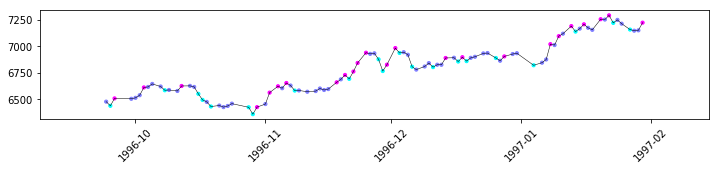

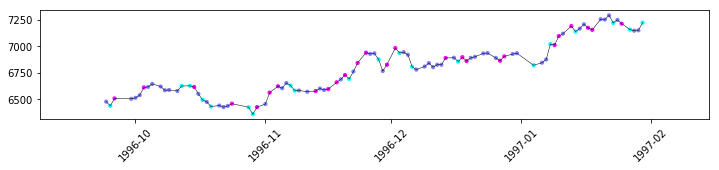

In [312]:
st=0
end=st+n+100

plt.figure(figsize=(12,2))
plt.title("REAL")
plt.scatter(dfd[n+st:end],dfc[n+st:end],c=y[st:end-n],s=10,cmap='cool')
plt.xticks(rotation=45)
plt.plot(dfd[n+st:end],dfc[n+st:end],c='black', linewidth=0.5)

plt.figure(figsize=(12,2))
plt.title("PREDICT")
plt.scatter(dfd[n+st:end],dfc[n+st:end],c=ypp[st:end-n],s=10,cmap='cool')
plt.xticks(rotation=45)
plt.plot(dfd[n+st:end],dfc[n+st:end],c='black', linewidth=0.5)